In [6]:
import matplotlib.pyplot as plt
import pickle
import yaml
% matplotlib inline

In [7]:
# Point this towards the output specified for attack_known_networks.py
PICKLEJAR="picklejar/"

In [14]:
def plot_network_comparisons(network_file):
    """
    Given a YAML config file written using the attack_comparison.compare_to_random_networks function,
    Read in the data from the pickle files of the networks in the file and plot the results of the attacks
    """
    
    nets = open(network_file, 'r')
    
    for network in yaml.load_all(nets):
        pfile = PICKLEJAR + network["name"]+".pickle"
    
        fi = open(pfile, 'r')
       
        fractions = pickle.load(fi)
       
        rnd, tgt, rnd_neighbor = pickle.load(fi)
       
        er_rnd, er_tgt, er_rnd_neighbor = pickle.load(fi)
       
        cfg_rnd, cfg_tgt, cfg_rnd_neighbor = pickle.load(fi)
       
        f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,30))
       
        f.suptitle("Network Comparisons: "+network["name"], fontsize=24)
       
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
       
        ax1.set_title("Original Network", fontsize=20)
        ax1.set_xlabel("Fraction of Nodes Removed")
        ax1.set_ylabel("|S1|/N")
      
        ax1.scatter(fractions, rnd, c="r")
        ax1.scatter(fractions, tgt, c="g")
        ax1.scatter(fractions, rnd_neighbor, c="b")
       
        ax1.legend(["Random Attack", "Targeted Attack", "Random-Neighbor Attack"])
       
       
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
       
        ax2.set_title("Erdos-Renyi Network", fontsize=20)
        ax2.set_xlabel("Fraction of Nodes Removed")
        ax2.set_ylabel("|S1|/N")
       
        ax2.scatter(fractions, er_rnd, c="r")
        ax2.scatter(fractions, er_tgt, c="g")
        ax2.scatter(fractions, er_rnd_neighbor, c="b")
       
        ax2.legend(["Random Attack", "Targeted Attack", "Random-Neighbor Attack"])
       
       
        ax3.set_xlim(0, 1)
        ax3.set_ylim(0, 1)    
       
        ax3.set_title("Configuration Model", fontsize=20)
        ax3.set_xlabel("Fraction of Nodes Removed")
        ax3.set_ylabel("|S1|/N")
       
        ax3.scatter(fractions, cfg_rnd, c="r")
        ax3.scatter(fractions, cfg_tgt, c="g")
        ax3.scatter(fractions, cfg_rnd_neighbor, c="b")
       
        ax3.legend(["Random Attack", "Targeted Attack", "Random-Neighbor Attack"])

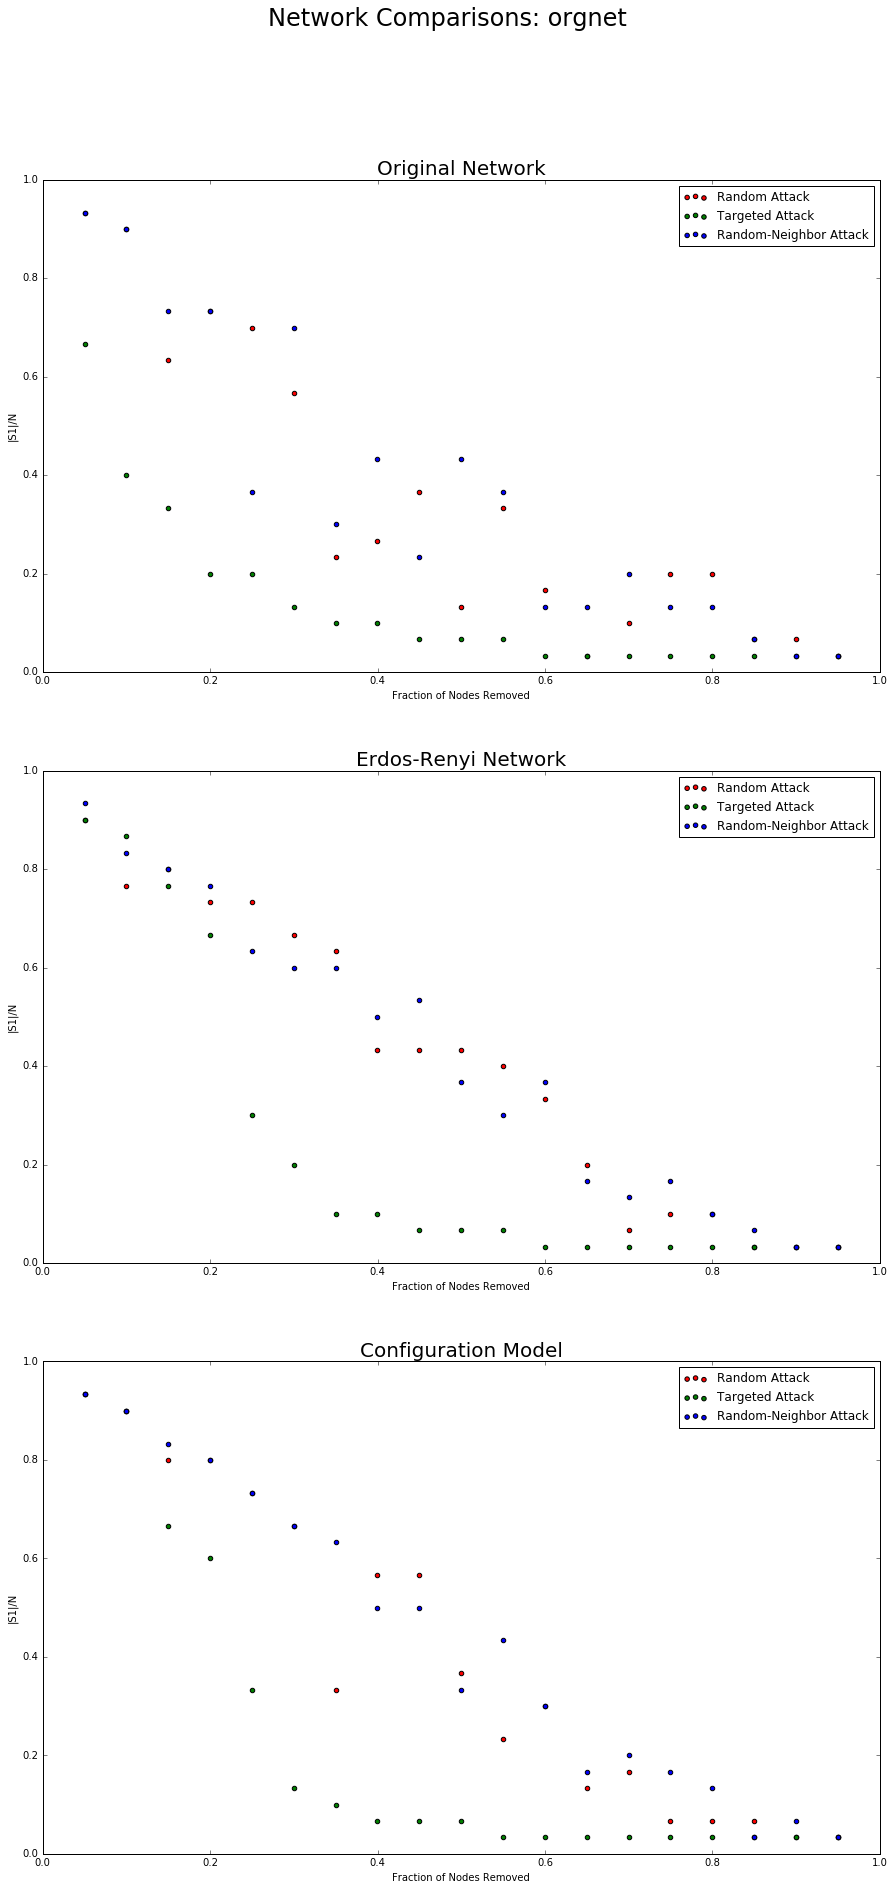

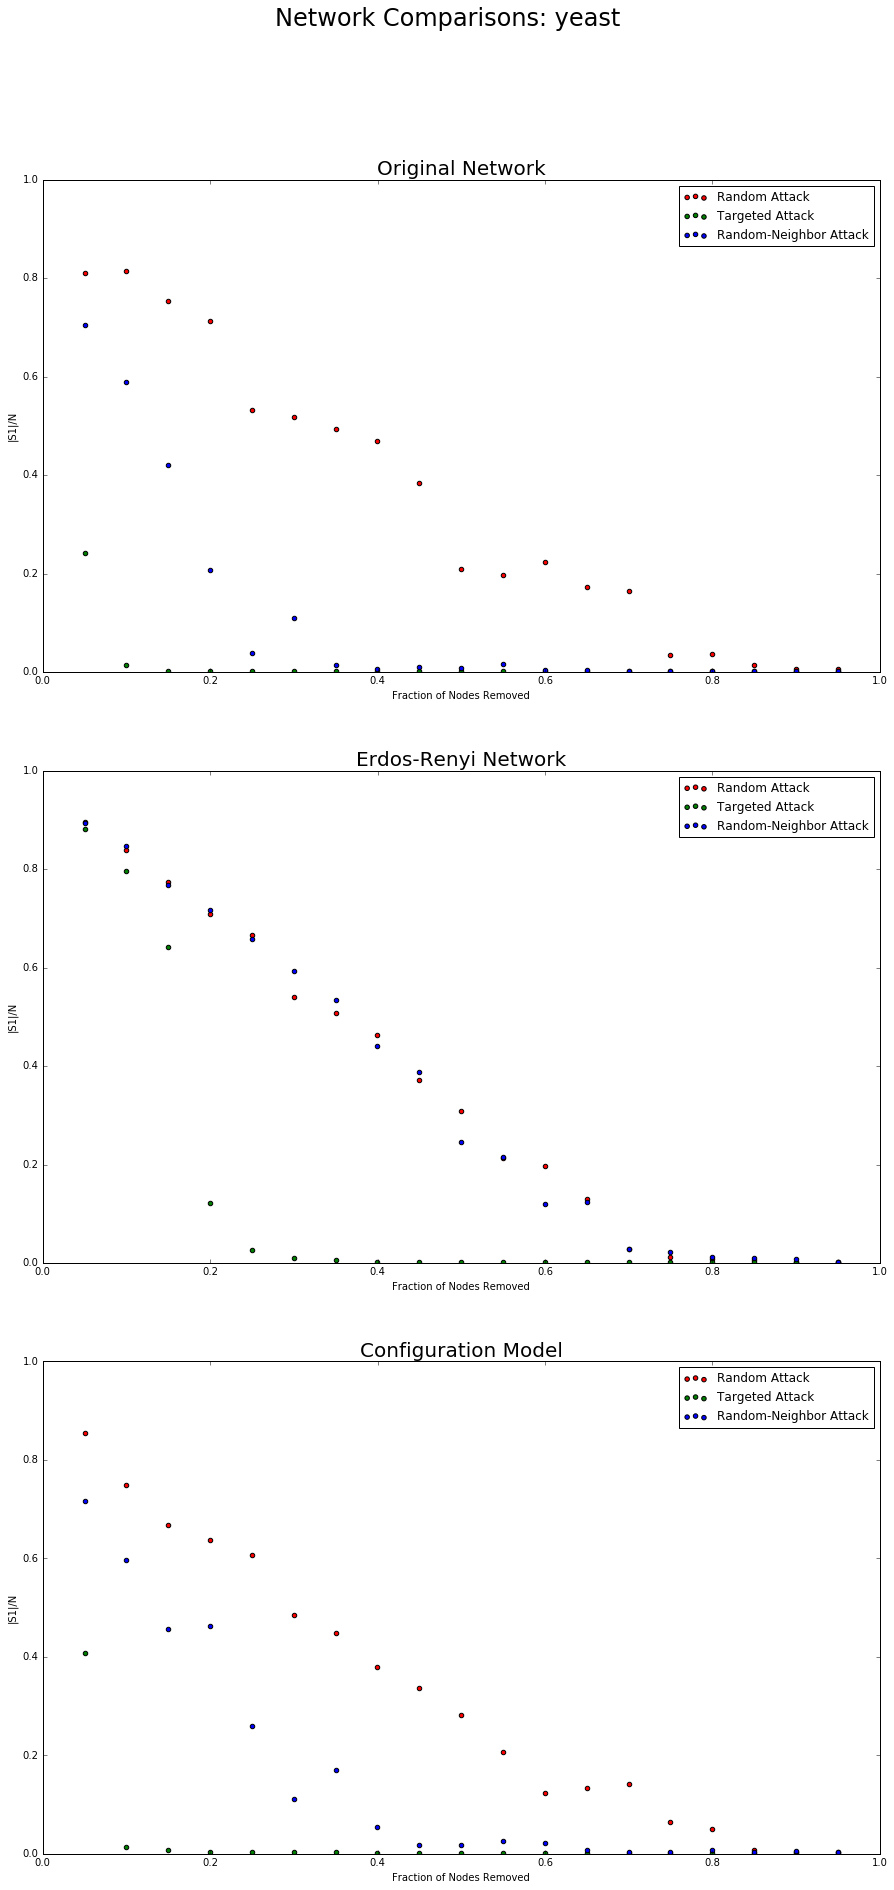

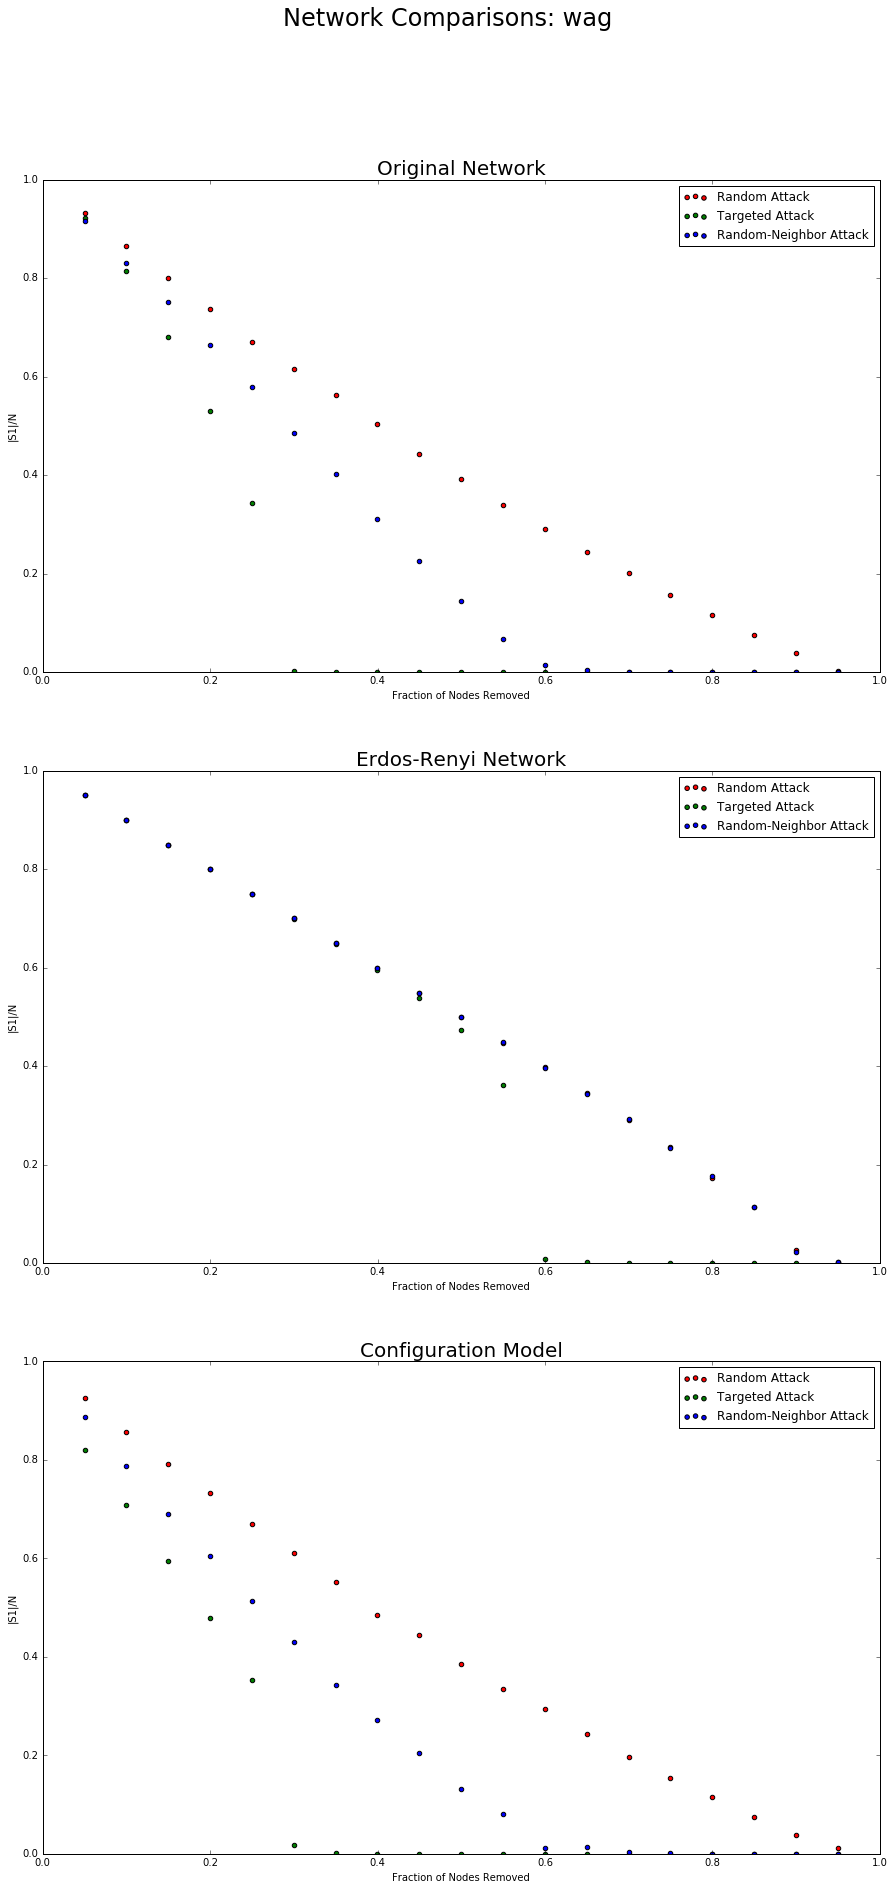

In [15]:
plot_network_comparisons("networks.yaml")